#### Load the Data

In [1]:
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#### Analyze the Data

In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape:',X_train.shape, Y_train.shape)
print('Testing data shape:',X_test.shape, Y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [3]:
# find the unique numbers from the train labels
classes = np.unique(Y_train)
num_classes = len(classes)
print('Total number of outputs:',num_classes)
print('Output classes:',classes)

Total number of outputs: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth: 9')

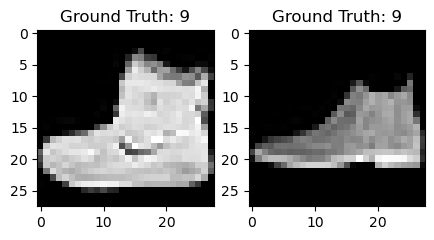

In [4]:
plt.figure(figsize=[5,5])

# display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:],cmap='gray')
plt.title('Ground Truth: {}'.format(Y_train[0]))

# display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:],cmap='gray')
plt.title('Ground Truth: {}'.format(Y_test[0]))

#### Data Preprocessing

In [5]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

In [8]:
# change labels from categorical to one-hot encoding
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)

# display the change for category label using one-hot encoding
print('Original label:',Y_train[0])
print('After conversion to one-hot:',Y_train_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, label_train, label_valid = train_test_split(X_train, Y_train_one_hot, test_size=0.2, random_state=13)

In [10]:
X_train.shape, X_valid.shape, label_train.shape, label_valid.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

#### The Network
- The first layer will have 32-3 x 3 filters,
- The second layer will have 64-3 x 3 filters and
- The third layer will have 128-3 x 3 filters.
- In addition, there are three max-pooling layers each of size 2 x 2.

#### Model the Data

In [12]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization
from keras.layers.advanced_activations import LeakyReLU

In [14]:
batch_size = 64
epochs = 20
num_classes = num_classes

#### Neural Network Architecture

In [20]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

#### Compile the model

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#### Train the model

In [22]:
history = model.fit(X_train, label_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_valid, label_valid))

Epoch 1/20
750/750 [==============================] - 21s 28ms/step - loss: 0.8392 - accuracy: 0.6872 - val_loss: 0.5606 - val_accuracy: 0.7965
Epoch 2/20
750/750 [==============================] - 20s 27ms/step - loss: 0.4935 - accuracy: 0.8170 - val_loss: 0.4449 - val_accuracy: 0.8388
Epoch 3/20
750/750 [==============================] - 21s 28ms/step - loss: 0.4163 - accuracy: 0.8469 - val_loss: 0.4233 - val_accuracy: 0.8413
Epoch 4/20
750/750 [==============================] - 21s 28ms/step - loss: 0.3744 - accuracy: 0.8618 - val_loss: 0.3685 - val_accuracy: 0.8676
Epoch 5/20
750/750 [==============================] - 21s 28ms/step - loss: 0.3437 - accuracy: 0.8715 - val_loss: 0.3732 - val_accuracy: 0.8618
Epoch 6/20
750/750 [==============================] - 23s 30ms/step - loss: 0.3217 - accuracy: 0.8806 - val_loss: 0.3281 - val_accuracy: 0.8809
Epoch 7/20
750/750 [==============================] - 22s 29ms/step - loss: 0.3044 - accuracy: 0.8877 - val_loss: 0.3212 - val_accuracy:

#### Model evaluation on the Test set

In [23]:
test_eval = model.evaluate(X_test, Y_test_one_hot, verbose=0)
print('Test loss:',test_eval[0])
print('Test accuracy:',test_eval[1])

Test loss: 0.2823575437068939
Test accuracy: 0.9014000296592712


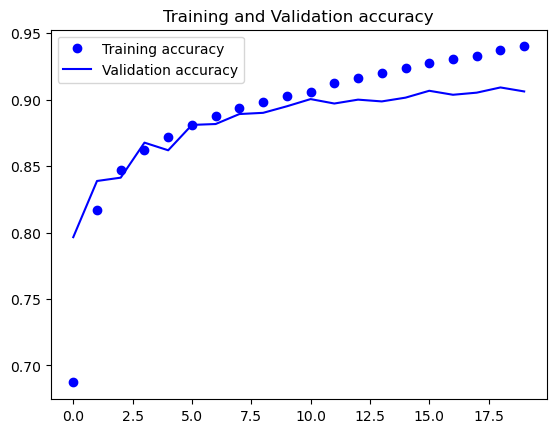

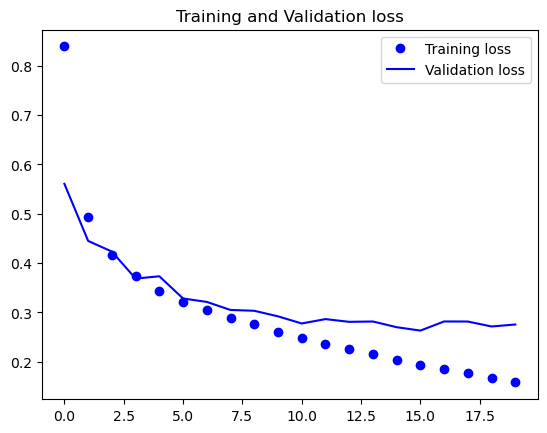

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo',label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

#### Adding Dropout into the Network

In [27]:
batch_size = 64
epochs = 20
num_classes = num_classes

In [28]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [29]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [30]:
model_dropout = model.fit(X_train, label_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_valid, label_valid))

Epoch 1/20
750/750 [==============================] - 24s 31ms/step - loss: 0.9209 - accuracy: 0.6510 - val_loss: 0.5841 - val_accuracy: 0.7819
Epoch 2/20
750/750 [==============================] - 23s 30ms/step - loss: 0.5829 - accuracy: 0.7801 - val_loss: 0.5029 - val_accuracy: 0.8182
Epoch 3/20
750/750 [==============================] - 23s 31ms/step - loss: 0.5022 - accuracy: 0.8093 - val_loss: 0.4372 - val_accuracy: 0.8381
Epoch 4/20
750/750 [==============================] - 26s 34ms/step - loss: 0.4484 - accuracy: 0.8324 - val_loss: 0.3894 - val_accuracy: 0.8547
Epoch 5/20
750/750 [==============================] - 29s 38ms/step - loss: 0.4137 - accuracy: 0.8435 - val_loss: 0.3661 - val_accuracy: 0.8657
Epoch 6/20
750/750 [==============================] - 24s 32ms/step - loss: 0.3894 - accuracy: 0.8537 - val_loss: 0.3475 - val_accuracy: 0.8692
Epoch 7/20
750/750 [==============================] - 24s 31ms/step - loss: 0.3665 - accuracy: 0.8625 - val_loss: 0.3321 - val_accuracy:

In [31]:
model.save('model_dropout.h5py')

INFO:tensorflow:Assets written to: model_dropout.h5py/assets


INFO:tensorflow:Assets written to: model_dropout.h5py/assets


#### Model Evaluation on the Test Set

In [32]:
test_eval = model.evaluate(X_test, Y_test_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:',test_eval[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.2915 - accuracy: 0.8955
Test loss: 0.29147225618362427
Test accuracy: 0.8955000042915344


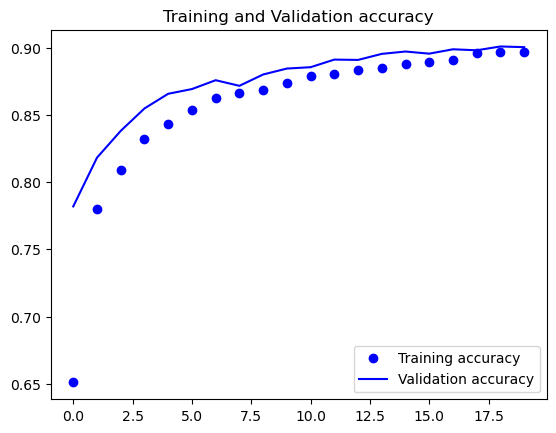

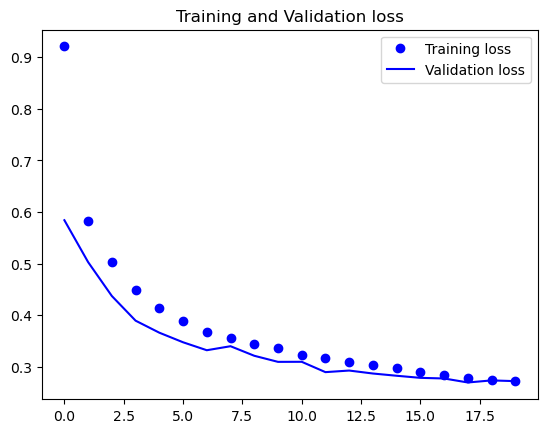

In [33]:
accuracy = model_dropout.history['accuracy']
val_accuracy = model_dropout.history['val_accuracy']
loss = model_dropout.history['loss']
val_loss = model_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo',label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

#### Predict Labels

In [34]:
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(np.round(predicted_labels),axis=1)
predicted_labels.shape, Y_test.shape

313/313 [==============================] - 2s 5ms/step


((10000,), (10000,))

Found 8874 correct labels


/var/folders/yz/4zp0zzb50w71fn6jwfwny__c0000gn/T/ipykernel_53106/3713376533.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


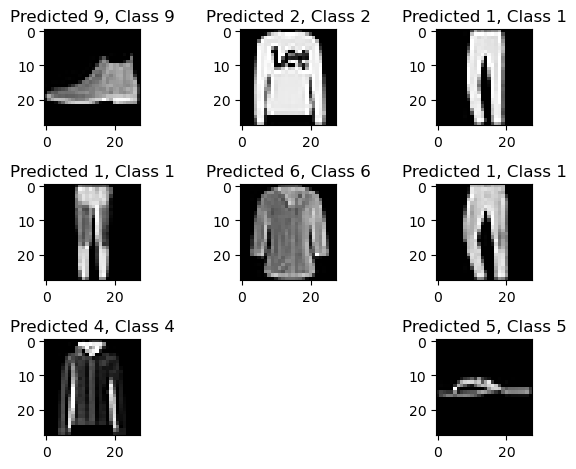

In [35]:
correct = np.where(predicted_labels==Y_test)[0]
print('Found {} correct labels'.format(len(correct)))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28),cmap='gray',interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_labels[correct],Y_test[correct]))
    plt.tight_layout()

Found 1126 incorrect labels


/var/folders/yz/4zp0zzb50w71fn6jwfwny__c0000gn/T/ipykernel_53106/1256489116.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


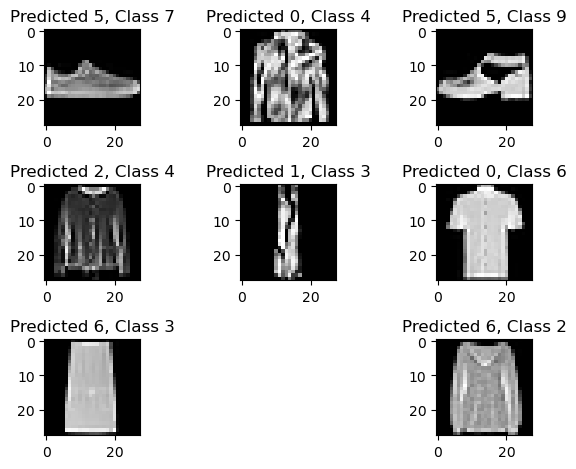

In [37]:
incorrect = np.where(predicted_labels!=Y_test)[0]
print('Found {} incorrect labels'.format(len(incorrect)))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28),cmap='gray',interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_labels[incorrect],Y_test[incorrect]))
    plt.tight_layout()

#### Classification Report

In [38]:
from sklearn.metrics import classification_report
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(Y_test, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.69      0.90      0.78      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.84      0.79      0.81      1000
     Class 3       0.89      0.91      0.90      1000
     Class 4       0.82      0.81      0.82      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.80      0.60      0.69      1000
     Class 7       0.94      0.97      0.96      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

